In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
#Rename the columns so they follow the PE8 (snake case).
##customer_df.columns

In [7]:
#lowercase
customer_df.columns = customer_df.columns.str.lower()  

In [8]:
#underscore
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [9]:
#after
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [65]:
#Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors ='coerce')
print(customer_df)


# plz ignore
# customer_df.style.format({"effective_to_date": lambda t: t.strftime("%d/%m/%Y")})
# print (customer_df)

#my_date = datetime.strptime(my_string, "%Y-%m-%d")


# def change_date_format(dt):
#         return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', '\\3-\\2-\\1', dt)


     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor        2011-02-24         Employed 

In [11]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [12]:
#numericals
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
numericals.shape

(9134, 8)

In [14]:
#Check NaN values per column.
#did this at the beginning, got zero nan for everything
#customer_df.isnull().sum()/len(customer_df)

In [15]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
categoricals.shape

(9134, 15)

In [17]:

categoricals = categoricals.drop('customer',axis=1)    
print(categoricals.shape)
categoricals.head()

(9134, 14)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [18]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [19]:
#set DataFrame #https://www.w3schools.com/python/pandas/pandas_dataframes.asp
time = pd.DataFrame()

In [20]:
time['month'] = customer_df['effective_to_date'].dt.month

In [21]:
time['week'] = customer_df['effective_to_date'].dt.week

<ipython-input-21-8949dfa62b8d>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time['week'] = customer_df['effective_to_date'].dt.week


In [22]:
time['day'] = customer_df['effective_to_date'].dt.day

In [23]:
time['year'] = customer_df['effective_to_date'].dt.year

In [24]:
#target
time['target_var'] = customer_df['total_claim_amount']

In [25]:
#sns.lineplot(x = time.year, y = time.target_var);

In [26]:
#sns.lineplot(x = time.day, y = time.target_var);

In [27]:
#sns.lineplot(x = time.month, y = time.target_var);

In [28]:
#sns.lineplot(x=time.week, y=time.target_var);

In [29]:
#time.week.value_counts()

In [30]:
#sns.lineplot(x = time.day, y = time.target_var, hue = time.month, palette='Set2');

In [31]:
#Define a function that differentiates between continuous and discrete variables. 
#Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
#https://keydifferences.com/difference-between-discrete-and-continuous-variable.html

# def is_discrete(customer_df):
#     for col in customer_df.columns:
#         if len(customer_df[col].unique())<=10:
#             print(col,len(customer_df[col].unique()))
#     return(customer_df)

# is_discrete(customer_df)

def define_variable(df, unique_value_max=10):           #Andy created this code
    categoricals = []
    num_continuous = []
    num_descrete = []
    for c in df.columns:
        if df[c].dtype == object:
            #print(c + " categorical")
            categoricals.append(c)
        else:
            if df[c].nunique() > unique_value_max:
                #print(c + " numerical - continuous")
                num_continuous.append(c)
            else:
                #print(c + " numerical - descrete")
                num_descrete.append(c)
        # maybe print the return order for added clarity on how to use function
        # is this going to throw a fit if we dont append anything to one of the vars...checked by passing back one of the split out dfs
    return df[categoricals], df[num_continuous], df[num_descrete]
cat_features, num_continuous_features, num_descrete_features = define_variable(customer_df)
cat_features2, num_continuous_features2, num_descrete_features2 = define_variable(cat_features) # check if this breaks function...
display(cat_features.head())
num_continuous_features = num_continuous_features.drop('effective_to_date',axis=1)    
# print(num_continuous_features.shape)

# display(num_continuous_features)
# display(num_descrete_features)



# def find_my_cat(numericals):
#      for col in customer_df.columns:
#          discrete_var = [key for key in dict(numericals.dtypes)
#              if dict(numericals.dtypes)[key] in ['int32','int64']]  
#          continuous_var = [key for key in dict(numericals.dtypes)
#              if dict(numericals.dtypes)[key] in ['float64','float32'] ]   
#      return(discrete_var,continuous_var)
    
# display(find_my_cat(numericals))

# def is_unique(numericals):
#     for col in numericals.columns:
#         if len(numericals[col].unique())<=10:
#             print(col,(numericals[col].unique()))
#     return(numericals)

# display(is_unique(numericals))


#this code works
# continuous_var = customer_df._get_numeric_data().columns
# display(continuous_var)
# discrete_var = list(set(customer_df.columns) - set(continuous_var))
# categorical_var


# continuous_var = [key for key in dict(customer_df.dtypes)
#                    if dict(customer_df.dtypes)[key]
#                        in ['float64','float32','int32','int64']] # Numeric Variable

# discrete_var = [key for key in dict(customer_df.dtypes)
#              if dict(customer_df.dtypes)[key] in ['object'] ] # Categorical Varible

# display(continuous_var)
# discrete_var

#interesting  this might be the correct way
# def is_discrete(customer_df):
#     for col in customer_df.columns:
#         if len(customer_df[col].unique())<=10:
#             print(col,len(customer_df[col].unique()))
#     return(customer_df)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
cat_features.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [33]:
# #matrix
# corrMatrix = numericals.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [34]:
# plt.figure(figsize=(15,8))
# sns.countplot('number_of_policies', hue='number_of_policies', data=num_descrete_features)
# plt.show()


In [35]:
display(numericals['number_of_open_complaints'].value_counts(dropna=False))
display(numericals['number_of_policies'].value_counts(dropna=False))

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [36]:
#For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
#Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

# categoricals = customer_df.select_dtypes(object)
cat_features.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [37]:
cat_features.shape

(9134, 15)

In [38]:
# #following the lab directions...
# def is_unique(categoricals):
#     for col in categoricals.columns:
#         if len(categoricals[col].unique())<=10:
#             print(col,(categoricals[col].unique()))
#     return(categoricals)

# is_unique(categoricals)

In [39]:

cat_features = cat_features.drop('customer',axis=1)    
print(cat_features.shape)
cat_features.head()

(9134, 14)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
# f, axes = plt.subplots(int(cat_features.shape[1]/2),2, figsize =(30,50))
# for i, col in enumerate(cat_features):
#     sns.barplot(x = cat_features[col].value_counts().index,
#                 y = cat_features[col].value_counts(),
#                 ax = axes[int(i/2)][int(i)%2])
#     axes[int(i/2)][int(i)%2].set_title(col,fontsize = 10)
#     axes[int(i/2)][int(i)%2].set_ylabel('')
    

In [41]:
def clean_employmentstatus(x):
    if x in ['Medical Leave','Disabled', 'Retired']:
        return 'Other'
    else:
        return x

In [42]:
cat_features['employmentstatus'] = cat_features['employmentstatus'].apply(clean_employmentstatus)

In [43]:
#sns.barplot(x=cat_features['employmentstatus'].value_counts().index, y=cat_features['employmentstatus'].value_counts());

In [44]:
def clean_education(x):
    if x in ['Master','Doctor']:
        return 'Higher Education'
    else:
        return x

In [45]:
cat_features['education'] = cat_features['education'].apply(clean_education)

In [46]:
#sns.barplot(x=cat_features['education'].value_counts().index, y=cat_features['education'].value_counts());

In [47]:
#discrete
# for col in num_descrete_features.columns :    
#     plt.figure(figsize=(10,5))
#     sns.countplot(x = col, data=num_descrete_features)
#     plt.show()


In [48]:
# #continuous
# for col in  num_continuous_features.columns :
#     sns.boxplot(data = num_continuous_features[col])
#     plt.show() 
#     print(col)

16414.039911750002


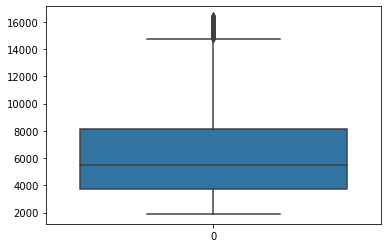

customer_lifetime_value


In [49]:
#We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
#Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
# customer_lifetime_value
iqr = np.percentile(num_continuous_features['customer_lifetime_value'],75) - np.percentile(num_continuous_features['customer_lifetime_value'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['customer_lifetime_value'],75) + 1.5*iqr      #upper limit is 16414
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['customer_lifetime_value'] < upper_limit]        

sns.boxplot(data = num_continuous_features['customer_lifetime_value'])
plt.show() 
print('customer_lifetime_value')

165.5


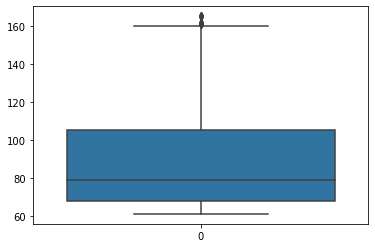

monthly_premium_auto


In [50]:
# monthly_premium_auto
iqr = np.percentile(num_continuous_features['monthly_premium_auto'],75) - np.percentile(num_continuous_features['monthly_premium_auto'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['monthly_premium_auto'],75) + 1.5*iqr      #upper limit is 165
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['monthly_premium_auto'] < upper_limit] 

sns.boxplot(data = num_continuous_features['monthly_premium_auto'])
plt.show() 
print('monthly_premium_auto')

923.7096106250001


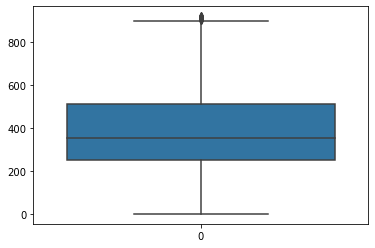

total_claim_amount


In [51]:
# total_claim_amount
iqr = np.percentile(num_continuous_features['total_claim_amount'],75) - np.percentile(num_continuous_features['total_claim_amount'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['total_claim_amount'],75) + 1.5*iqr      #upper limit is 923
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['total_claim_amount'] < upper_limit] 

sns.boxplot(data = num_continuous_features['total_claim_amount'])
plt.show() 
print('total_claim_amount')

In [52]:
#num_continuous_features['customer_lifetime_value'].hist()

In [53]:
#num_continuous_features['monthly_premium_auto'].hist()

In [54]:
#num_continuous_features['total_claim_amount'].hist()

In [55]:
#Create a copy of the dataframe for the data wrangling.


In [56]:
#Normalize the continuous variables. You can use any one method you want.
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
continuous_feat=pd.DataFrame(scaler.fit_transform(num_continuous_features),
            columns=num_continuous_features.columns, index=num_continuous_features.index) 
print(continuous_feat)

      customer_lifetime_value    income  monthly_premium_auto  \
0                    0.059651  0.562847              0.076923   
2                    0.757387  0.487763              0.451923   
3                    0.396140  0.000000              0.432692   
4                    0.063109  0.438443              0.115385   
5                    0.438211  0.629140              0.076923   
...                       ...       ...                   ...   
9128                 0.151788  0.477701              0.413462   
9130                 0.082600  0.216081              0.173077   
9131                 0.431842  0.000000              0.230769   
9132                 0.387772  0.219452              0.336538   
9133                 0.049197  0.000000              0.153846   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
2                    0.514286                       0.383838   
3                    0.5142

In [57]:
cat_features.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [58]:
cat_features.nunique()

state               5
response            2
coverage            3
education           4
employmentstatus    3
gender              2
location_code       3
marital_status      3
policy_type         3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64

In [59]:
#Encode the categorical variables (the columns which have > 4 unique var)

oneEncode_cols = ['state','education','employmentstatus','policy',
                  'renew_offer_type','sales_channel','vehicle_class']
oneEncode_df = cat_features[oneEncode_cols]
oneEncode_df.head()

,state,education,employmentstatus,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Employed,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Unemployed,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Employed,Personal L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Unemployed,Corporate L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Employed,Personal L1,Offer1,Agent,Four-Door Car


In [60]:
encoded_df = pd.get_dummies(oneEncode_df, columns = oneEncode_cols,drop_first = True)                           
encoded_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_High School or Below,education_Higher Education,employmentstatus_Other,employmentstatus_Unemployed,policy_Corporate L2,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#ignore
# date_df = customer_df[['customer','effective_to_date']]
# date_df.head()

In [67]:
data = customer_df

In [69]:
#transform date column

data['month'] = data['effective_to_date'].dt.month
data['day'] = data['effective_to_date'].dt.day
data = data.drop(['effective_to_date'], axis = 1)




In [ ]:
#ignore
# overall_df = pd.concat([continous_df,discrete_df,encoded_df], axis = 1)
# display(overall_df.shape)
# overall_df.head()

In [ ]:
# Additional question to today’s lab:
# Find out if there is a relationship between the following categorical columns using Chi-Squared: 
# education - vehicle_size
# location_code - coverage
# Comment on what the presence (or not) of this relationship means for your dataset and if there are any steps you should take.

In [70]:
import scipy.stats as st

In [76]:
cat_features.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [73]:
data_1 = pd.crosstab(cat_features['education'], cat_features['vehicle_size'], margins = False)
print('p val education - vehicle_size', round(st.chi2_contingency(data_1)[1],3))
#p is high, H0 MUST STAY!

p val education - vehicle_size 0.171


In [74]:
data_2 = pd.crosstab(cat_features['location_code'], cat_features['coverage'], margins = False)
print('p val location_code - coverage', round(st.chi2_contingency(data_2)[1],3))
#p is low, H0 MUST GO!

p val location_code - coverage 0.0
